In [1]:
import pandas as pd

In [2]:
d = pd.read_csv("/Users/kashishtyagi/Desktop/india-usa_innings_data.csv")

In [3]:
d.head()

,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_0_player_out,wickets_0_kind,team,over,...,wickets_0_fielders_0_name,review_by,review_umpire,review_batter,review_decision,review_type,extras_legbyes,wickets_0_fielders_1_name,extras_noballs,extras_penalty
0,Shayan Jahangir,Arshdeep Singh,SR Taylor,0,0,0,Shayan Jahangir,lbw,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGS Gous,Arshdeep Singh,SR Taylor,0,0,0,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGS Gous,Arshdeep Singh,SR Taylor,0,0,0,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGS Gous,Arshdeep Singh,SR Taylor,0,1,1,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGS Gous,Arshdeep Singh,SR Taylor,2,0,2,NaN,NaN,United States of America,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   batter                     236 non-null    object 
 1   bowler                     236 non-null    object 
 2   non_striker                236 non-null    object 
 3   runs_batter                236 non-null    int64  
 4   runs_extras                236 non-null    int64  
 5   runs_total                 236 non-null    int64  
 6   wickets_0_player_out       11 non-null     object 
 7   wickets_0_kind             11 non-null     object 
 8   team                       236 non-null    object 
 9   over                       236 non-null    int64  
 10  extras_wides               5 non-null      float64
 11  wickets_0_fielders_0_name  8 non-null      object 
 12  review_by                  1 non-null      object 
 13  review_umpire              1 non-null      object 

In [6]:
d.shape

(236, 21)

# Missing Data

In [9]:
d.isnull().sum()

batter                         0
bowler                         0
non_striker                    0
runs_batter                    0
runs_extras                    0
runs_total                     0
wickets_0_player_out         225
wickets_0_kind               225
team                           0
over                           0
extras_wides                 231
wickets_0_fielders_0_name    228
review_by                    235
review_umpire                235
review_batter                235
review_decision              235
review_type                  235
extras_legbyes               234
wickets_0_fielders_1_name    235
extras_noballs               235
extras_penalty               235
dtype: int64

In [13]:
d.dtypes

batter                        object
bowler                        object
non_striker                   object
runs_batter                    int64
runs_extras                    int64
runs_total                     int64
wickets_0_player_out          object
wickets_0_kind                object
team                          object
over                           int64
extras_wides                 float64
wickets_0_fielders_0_name     object
review_by                     object
review_umpire                 object
review_batter                 object
review_decision               object
review_type                   object
extras_legbyes               float64
wickets_0_fielders_1_name     object
extras_noballs               float64
extras_penalty               float64
dtype: object

# The data has null values in various columns. But in such datasets, even null values have a meaning, so we will leave them as it is and move forward.

# Grouping Data

In [14]:
# total runs scored by each team
total_runs = d.groupby('team')['runs_total'].sum()

In [36]:
# total wickets taken by each team
total_wickets = d['wickets_0_player_out'].notna().groupby(d['team']).sum()

In [19]:
# total extras
total_extras = d[['team','runs_extras', 'extras_wides', 'extras_noballs', 'extras_legbyes', 'extras_penalty']].groupby('team').sum()

In [20]:
# runs scored by each batter
batter_runs = d.groupby('batter')['runs_batter'].sum()

In [21]:
# balls faced by each batter
balls_faced = d.groupby('batter').size()

In [22]:
# strike rate of each batter
strike_rate = (batter_runs / balls_faced) * 100

In [23]:
# boundaries hit by each batter
boundaries = d[(d['runs_batter'] == 4) | (d['runs_batter'] == 6)].groupby(['batter', 'runs_batter']).size().unstack(fill_value=0)

In [25]:
# wickets taken by each bowler
wickets_taken = d['wickets_0_player_out'].notna().groupby(d['bowler']).sum()

In [26]:
# runs conceded by each bowler
runs_conceded = d.groupby('bowler')['runs_total'].sum()

In [27]:
# balls bowled by each bowler
balls_bowled = d.groupby('bowler').size()

In [28]:
# economy rate of each bowler
economy_rate = runs_conceded / (balls_bowled / 6)

In [29]:
# dott balls bowled by each bowler
dot_balls = d[d['runs_total'] == 0].groupby('bowler').size()

In [30]:
# combine all these statistics into dataframes for batters and bowlers
batter_stats = pd.DataFrame({
    'Runs': batter_runs,
    'Balls Faced': balls_faced,
    'Strike Rate': strike_rate,
}).join(boundaries)

bowler_stats = pd.DataFrame({
    'Wickets': wickets_taken,
    'Runs Conceded': runs_conceded,
    'Balls Bowled': balls_bowled,
    'Economy Rate': economy_rate,
    'Dot Balls': dot_balls,
})

In [31]:
total_runs

team
India                       111
United States of America    110
Name: runs_total, dtype: int64

In [37]:
total_wickets

team
India                       3
United States of America    8
Name: wickets_0_player_out, dtype: int64

In [33]:
total_extras

,runs_extras,extras_wides,extras_noballs,extras_legbyes,extras_penalty
team,,,,,
India,9,2.0,1.0,1.0,5.0
United States of America,8,7.0,0.0,1.0,0.0


In [39]:
batter_stats

,Runs,Balls Faced,Strike Rate,4,6
batter,,,,,
AGS Gous,2,6,33.333333,NaN,NaN
Aaron Jones,11,22,50.000000,0.0,1.0
CJ Anderson,15,12,125.000000,1.0,1.0
Harmeet Singh,10,10,100.000000,0.0,1.0
Jasdeep Singh,2,7,28.571429,NaN,NaN
NR Kumar,27,24,112.500000,2.0,1.0
RG Sharma,3,6,50.000000,NaN,NaN
RR Pant,18,20,90.000000,1.0,1.0
S Dube,31,37,83.783784,1.0,1.0


In [40]:
bowler_stats

,Wickets,Runs Conceded,Balls Bowled,Economy Rate,Dot Balls
bowler,,,,,
AR Patel,1,25,19,7.894737,5
Ali Khan,1,22,21,6.285714,7
Arshdeep Singh,4,9,25,2.160000,17
CJ Anderson,0,22,19,6.947368,8
HH Pandya,2,15,24,3.750000,18
JJ Bumrah,0,25,25,6.000000,14
Jasdeep Singh,0,24,25,5.760000,11
Mohammed Siraj,1,25,24,6.250000,11
S Dube,0,11,6,11.000000,3


# Data Visualization

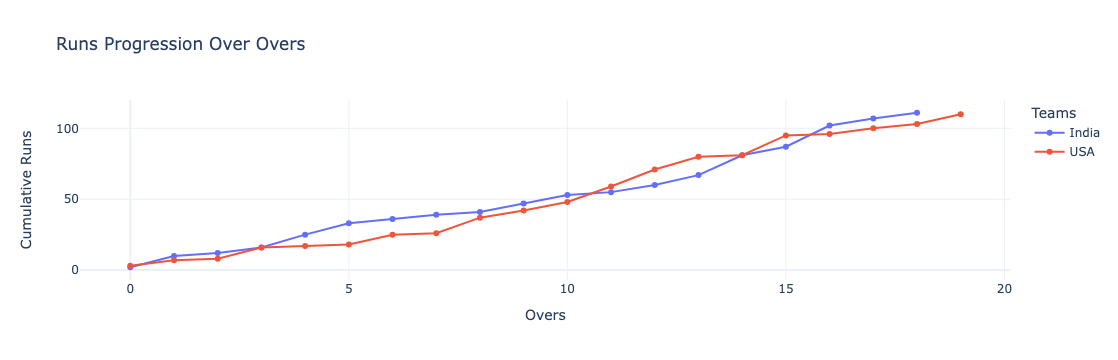

In [41]:
#progression of the run over overs
import plotly.graph_objects as go

india_runs_progression = d[d['team'] == 'India'].groupby('over')['runs_total'].sum().cumsum()
usa_runs_progression = d[d['team'] == 'United States of America'].groupby('over')['runs_total'].sum().cumsum()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=india_runs_progression.index,
    y=india_runs_progression.values,
    mode='lines+markers',
    name='India'
))

fig.add_trace(go.Scatter(
    x=usa_runs_progression.index,
    y=usa_runs_progression.values,
    mode='lines+markers',
    name='USA'
))

fig.update_layout(
    title='Runs Progression Over Overs',
    xaxis_title='Overs',
    yaxis_title='Cumulative Runs',
    legend_title='Teams',
    template='plotly_white'
)

fig.show()

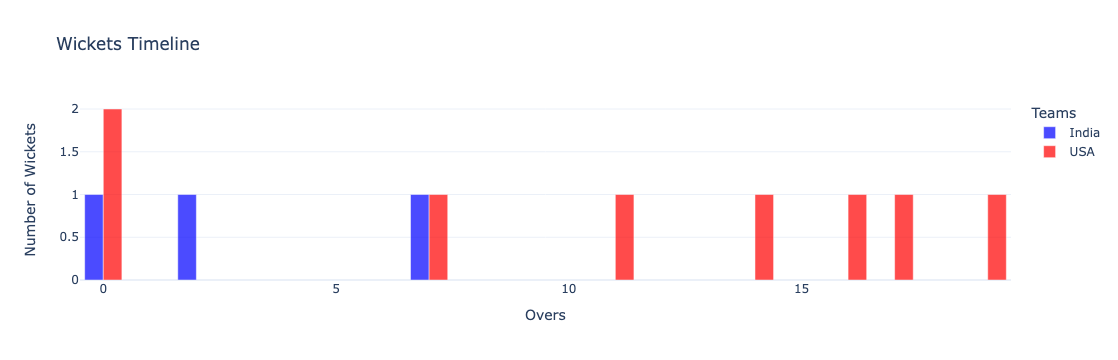

In [42]:
# Wickets timeline(1-20 wickets)
india_wickets = d[(d['team'] == 'India') & d['wickets_0_player_out'].notna()].groupby('over').size()
usa_wickets = d[(d['team'] == 'United States of America') & d['wickets_0_player_out'].notna()].groupby('over').size()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=india_wickets.index,
    y=india_wickets.values,
    name='India',
    marker_color='blue',
    opacity=0.7
))

fig.add_trace(go.Bar(
    x=usa_wickets.index,
    y=usa_wickets.values,
    name='USA',
    marker_color='red',
    opacity=0.7
))

fig.update_layout(
    title='Wickets Timeline',
    xaxis_title='Overs',
    yaxis_title='Number of Wickets',
    barmode='group',
    template='plotly_white',
    legend_title='Teams'
)

fig.show()

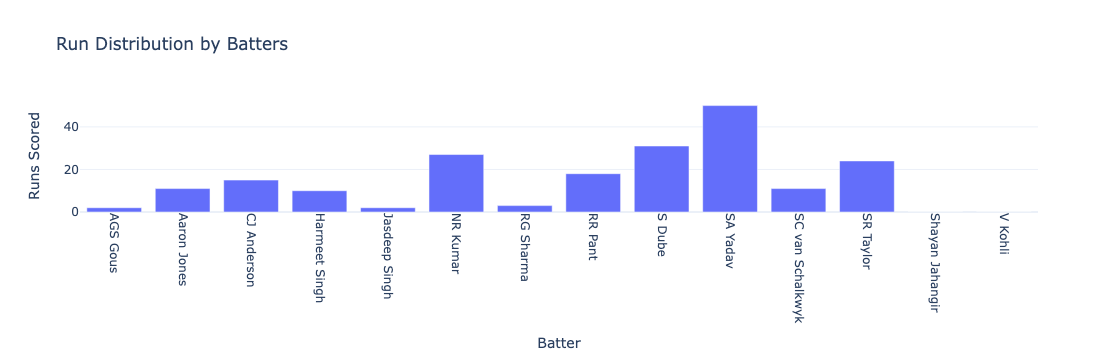

In [43]:
# Run distribution by batter
import plotly.express as px

fig = px.bar(
    batter_stats,
    x=batter_stats.index,
    y='Runs',
    title='Run Distribution by Batters',
    labels={'x': 'Batter', 'Runs': 'Runs Scored'},
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Batter',
    yaxis_title='Runs Scored',
    xaxis=dict(tickangle=90)
)

fig.show()

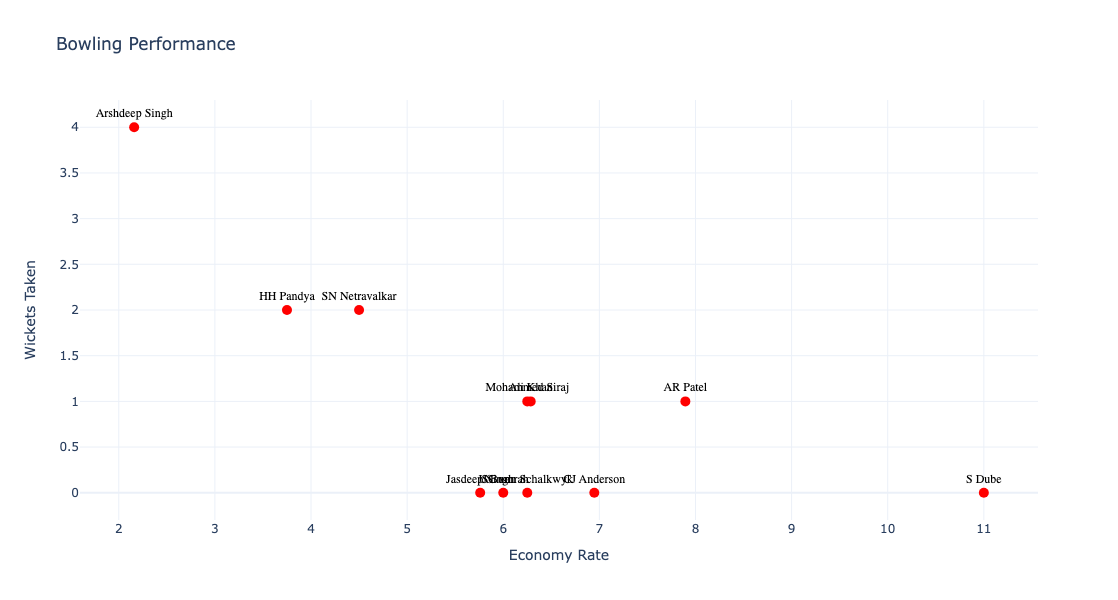

In [44]:
# Bowling performance (heatmap )
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=bowler_stats['Economy Rate'],
    y=bowler_stats['Wickets'],
    mode='markers+text',
    text=bowler_stats.index,
    textposition='top center',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    ),
    marker=dict(color='red', size=10),
    name='Bowlers'
))

fig.update_layout(
    title='Bowling Performance',
    xaxis_title='Economy Rate',
    yaxis_title='Wickets Taken',
    template='plotly_white',
    autosize=False,
    width=800,
    height=600
)

fig.show()

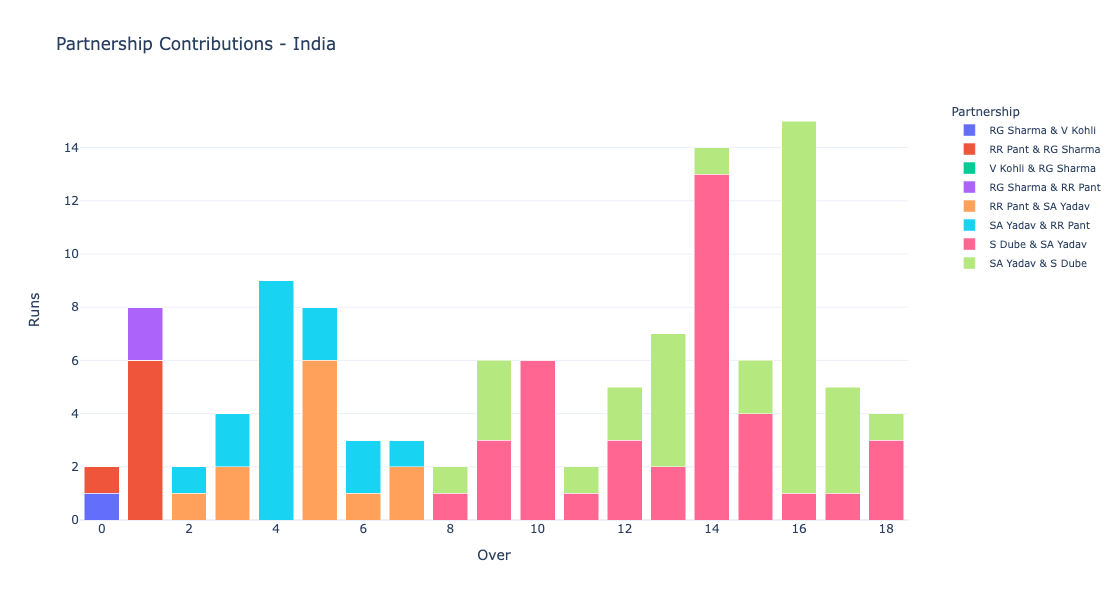

In [45]:
# Partnership contributions in the India’s innings
# separate data for India and USA
india_partnership_data = d[d['team'] == 'India'].groupby(['over', 'batter', 'non_striker'])['runs_total'].sum().reset_index()
usa_partnership_data = d[d['team'] == 'United States of America'].groupby(['over', 'batter', 'non_striker'])['runs_total'].sum().reset_index()

# create pivot tables for better visualization
india_partnership_pivot = india_partnership_data.pivot(index='over', columns=['batter', 'non_striker'], values='runs_total').fillna(0)
usa_partnership_pivot = usa_partnership_data.pivot(index='over', columns=['batter', 'non_striker'], values='runs_total').fillna(0)


# convert the pivot table to a long format
india_partnership_long = india_partnership_pivot.reset_index().melt(id_vars='over', var_name=['batter', 'non_striker'], value_name='runs_total')

# create a stacked bar chart
fig = go.Figure()

# add bars for each partnership
for (batter, non_striker) in india_partnership_pivot.columns:
    partnership_data = india_partnership_long[(india_partnership_long['batter'] == batter) & (india_partnership_long['non_striker'] == non_striker)]
    fig.add_trace(go.Bar(
        x=partnership_data['over'],
        y=partnership_data['runs_total'],
        name=f'{batter} & {non_striker}'
    ))

fig.update_layout(
    title='Partnership Contributions - India',
    xaxis_title='Over',
    yaxis_title='Runs',
    barmode='stack',
    template='plotly_white',
    legend_title='Partnership',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        font=dict(size=10)
    ),
    autosize=False,
    width=900,
    height=600
)

fig.show()

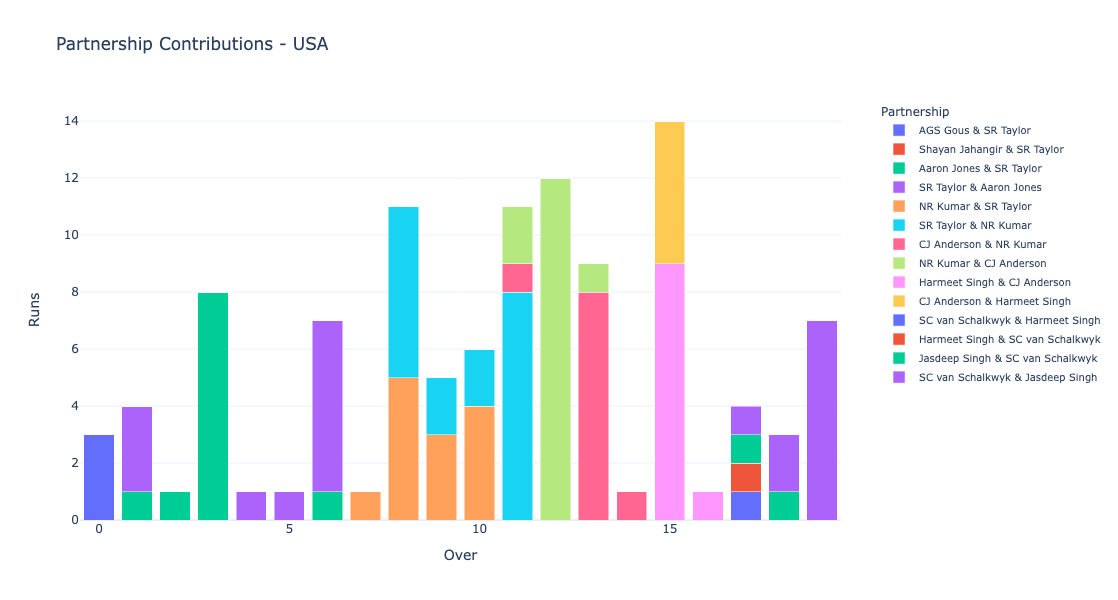

In [46]:
# Partnership contributions in the USA’s innings
usa_partnership_long = usa_partnership_pivot.reset_index().melt(id_vars='over', var_name=['batter', 'non_striker'], value_name='runs_total')

# create a stacked bar chart
fig = go.Figure()

# add bars for each partnership
for (batter, non_striker) in usa_partnership_pivot.columns:
    partnership_data = usa_partnership_long[(usa_partnership_long['batter'] == batter) & (usa_partnership_long['non_striker'] == non_striker)]
    fig.add_trace(go.Bar(
        x=partnership_data['over'],
        y=partnership_data['runs_total'],
        name=f'{batter} & {non_striker}'
    ))

fig.update_layout(
    title='Partnership Contributions - USA',
    xaxis_title='Over',
    yaxis_title='Runs',
    barmode='stack',
    template='plotly_white',
    legend_title='Partnership',
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        font=dict(size=10)
    ),
    autosize=False,
    width=900,
    height=600
)

fig.show()

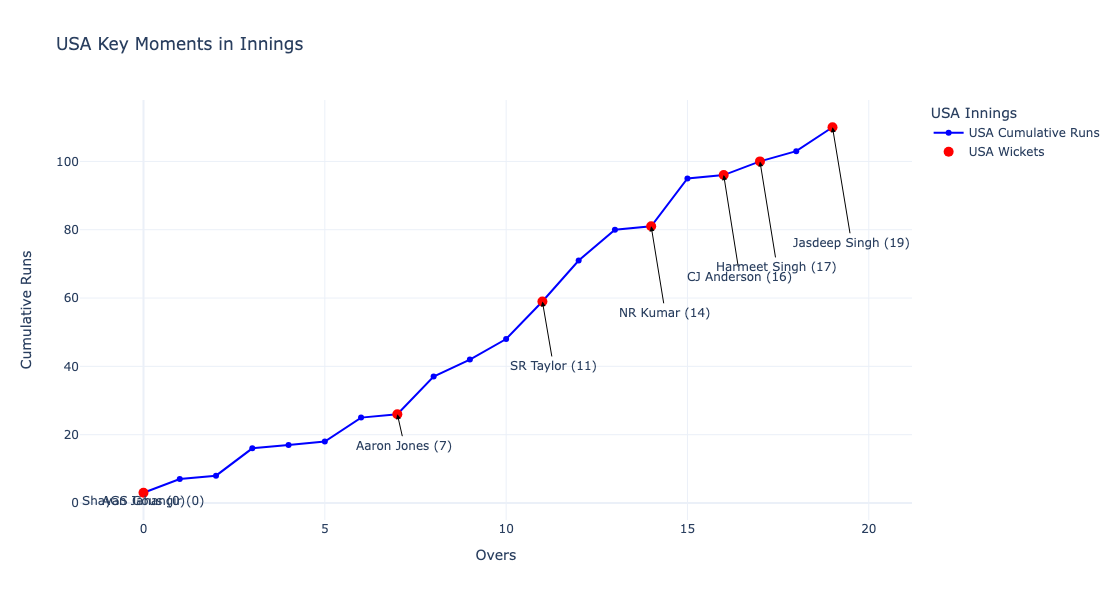

In [47]:
# key moments for the USA in the innings
# cumulative runs for both teams over the overs
india_cumulative_runs = d[d['team'] == 'India'].groupby('over')['runs_total'].sum().cumsum()
usa_cumulative_runs = d[d['team'] == 'United States of America'].groupby('over')['runs_total'].sum().cumsum()

# extract key moments where wickets fell or significant runs were scored
india_key_moments = d[(d['team'] == 'India') & d['wickets_0_player_out'].notna()]
usa_key_moments = d[(d['team'] == 'United States of America') & d['wickets_0_player_out'].notna()]

# significant runs scored by India
india_significant_runs = d[(d['team'] == 'India') & (d['runs_total'] >= 4)]

# significant runs scored by USA
usa_significant_runs = d[(d['team'] == 'United States of America') & (d['runs_total'] >= 4)]

usa_wickets_fall = d[(d['team'] == 'United States of America') & d['wickets_0_player_out'].notna()].groupby('over').size().cumsum()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=usa_cumulative_runs.index,
    y=usa_cumulative_runs.values,
    mode='lines+markers',
    name='USA Cumulative Runs',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=usa_wickets_fall.index,
    y=usa_cumulative_runs.loc[usa_wickets_fall.index],
    mode='markers',
    name='USA Wickets',
    marker=dict(color='red', size=10)
))

# Add annotations for key moments
for _, row in usa_key_moments.iterrows():
    fig.add_annotation(
        x=row['over'],
        y=usa_cumulative_runs.loc[row['over']],
        text=f"{row['batter']} ({row['over']})",
        showarrow=True,
        arrowhead=2,
        ax=row['over'],
        ay=usa_cumulative_runs.loc[row['over']] + 5,
        arrowcolor='black'
    )

fig.update_layout(
    title='USA Key Moments in Innings',
    xaxis_title='Overs',
    yaxis_title='Cumulative Runs',
    template='plotly_white',
    legend_title='USA Innings',
    autosize=False,
    width=900,
    height=600
)

fig.show()

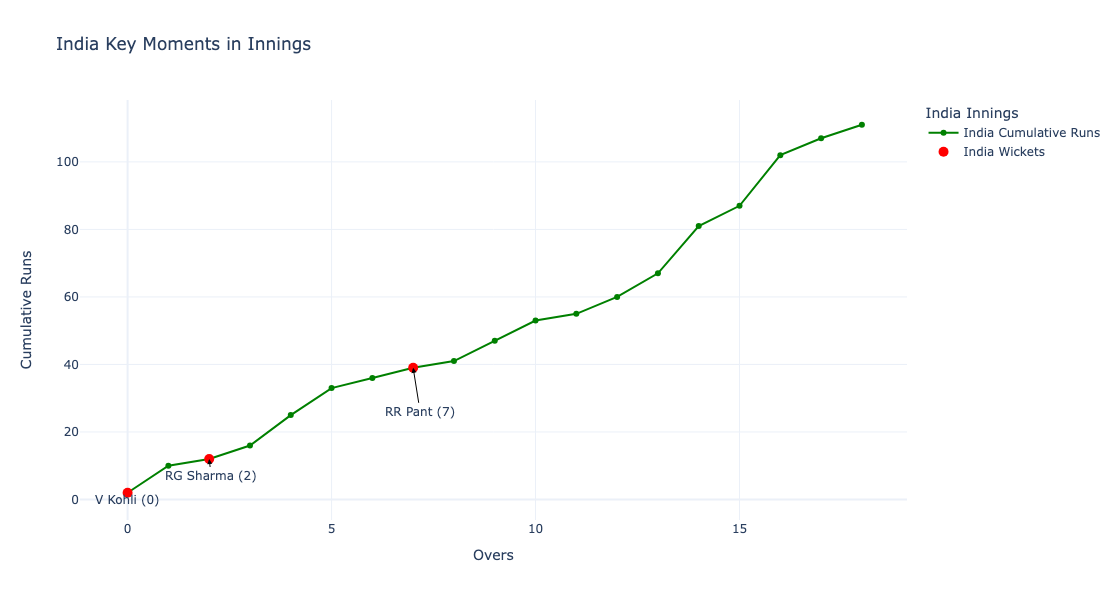

In [48]:
# Key moments for India
india_cumulative_runs = d[d['team'] == 'India'].groupby('over')['runs_total'].sum().cumsum()
india_wickets_fall = d[(d['team'] == 'India') & d['wickets_0_player_out'].notna()].groupby('over').size().cumsum()
india_key_moments = d[(d['team'] == 'India') & d['wickets_0_player_out'].notna()].reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=india_cumulative_runs.index,
    y=india_cumulative_runs.values,
    mode='lines+markers',
    name='India Cumulative Runs',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=india_wickets_fall.index,
    y=india_cumulative_runs.loc[india_wickets_fall.index],
    mode='markers',
    name='India Wickets',
    marker=dict(color='red', size=10)
))

for _, row in india_key_moments.iterrows():
    fig.add_annotation(
        x=row['over'],
        y=india_cumulative_runs.loc[row['over']],
        text=f"{row['batter']} ({row['over']})",
        showarrow=True,
        arrowhead=2,
        ax=row['over'],
        ay=india_cumulative_runs.loc[row['over']] + 5,
        arrowcolor='black'
    )

fig.update_layout(
    title='India Key Moments in Innings',
    xaxis_title='Overs',
    yaxis_title='Cumulative Runs',
    template='plotly_white',
    legend_title='India Innings',
    autosize=False,
    width=900,
    height=600
)

fig.show()

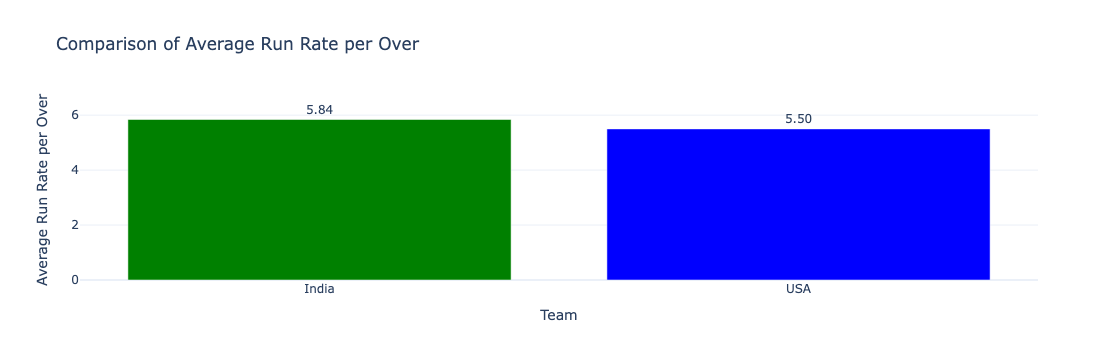

In [49]:
# Compare the average run rate for both teams
india_run_rate = d[d['team'] == 'India'].groupby('over')['runs_total'].sum().mean()
usa_run_rate = d[d['team'] == 'United States of America'].groupby('over')['runs_total'].sum().mean()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=['India', 'USA'],
    y=[india_run_rate, usa_run_rate],
    marker_color=['green', 'blue']
))

fig.add_annotation(
    x='India',
    y=india_run_rate,
    text=f"{india_run_rate:.2f}",
    showarrow=False,
    yshift=10
)

fig.add_annotation(
    x='USA',
    y=usa_run_rate,
    text=f"{usa_run_rate:.2f}",
    showarrow=False,
    yshift=10
)

fig.update_layout(
    title='Comparison of Average Run Rate per Over',
    xaxis_title='Team',
    yaxis_title='Average Run Rate per Over',
    template='plotly_white'
)

fig.show()

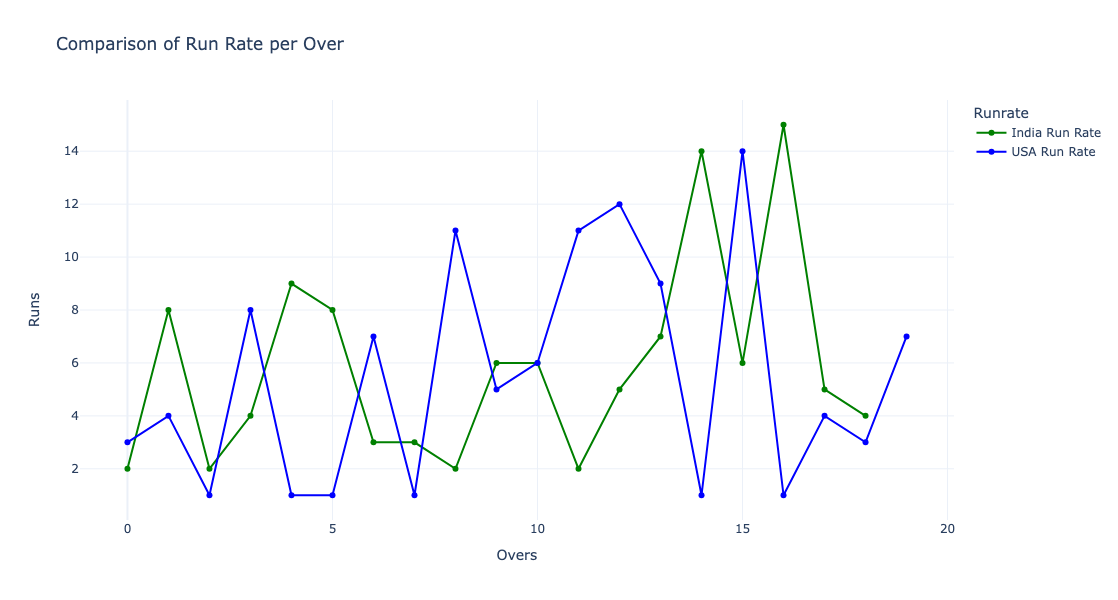

In [50]:
# Comparison of the run rate per over
india_run_rate_per_over = d[d['team'] == 'India'].groupby('over')['runs_total'].sum()
usa_run_rate_per_over = d[d['team'] == 'United States of America'].groupby('over')['runs_total'].sum()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=india_run_rate_per_over.index,
    y=india_run_rate_per_over.values,
    mode='lines+markers',
    name='India Run Rate',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=usa_run_rate_per_over.index,
    y=usa_run_rate_per_over.values,
    mode='lines+markers',
    name='USA Run Rate',
    line=dict(color='blue')
))

fig.update_layout(
    title='Comparison of Run Rate per Over',
    xaxis_title='Overs',
    yaxis_title='Runs',
    template='plotly_white',
    legend_title='Runrate',
    autosize=False,
    width=1000,
    height=600
)

fig.show()

# Summary

#### In conclusion, India’s strategy of consistent scoring, effective partnerships, and a balanced bowling attack proved successful against the USA’s inconsistent batting performance and less impactful bowling.